In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [55]:
df=pd.read_csv("C:\\Users\\Aayush Kandpal\\Downloads\\SBIN.NS (2).csv")


In [56]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-04,334.100006,342.950012,331.850006,341.850006,341.850006,26789483.0
1,2019-12-05,343.000000,344.600006,335.149994,336.200012,336.200012,30429507.0
2,2019-12-06,336.700012,337.649994,318.000000,320.000000,320.000000,47027528.0
3,2019-12-09,318.950012,327.649994,314.750000,316.700012,316.700012,52435239.0
4,2019-12-10,317.200012,322.649994,312.250000,313.399994,313.399994,52155809.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       267 non-null    object 
 1   Open       266 non-null    float64
 2   High       266 non-null    float64
 3   Low        266 non-null    float64
 4   Close      266 non-null    float64
 5   Adj Close  266 non-null    float64
 6   Volume     266 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.7+ KB


In [58]:
df['Date']=pd.to_datetime(df.Date)
df=df.dropna()

In [130]:
train, test = df.loc[df['Date'] <= '2020-09-16'], df.loc[df['Date'] > '2020-09-16']
train.shape, test.shape

((197, 7), (69, 7))

In [131]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Date'], y=train.Close,
                    mode='lines+markers',
                    name='training_data'))

fig.add_trace(go.Scatter(x=test['Date'], y=test.Close,
                    mode='lines+markers',
                    name='testing_data'))

fig.update_layout(title='Plot of the SBI Stock price from December 2019 to December 2020')


In [132]:
# Let us see how the returns have been ove the year on a daily basis in percentage
train["Daily_Returns"] = train['Close'].pct_change(fill_method='ffill')*100
test["Daily_Returns"] = test['Close'].pct_change(fill_method='ffill')*100

In [133]:
train['Daily_Returns'] = train['Daily_Returns'].fillna(0)
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2019-12-04,334.100006,342.950012,331.850006,341.850006,341.850006,26789483.0,0.000000
1,2019-12-05,343.000000,344.600006,335.149994,336.200012,336.200012,30429507.0,-1.652770
2,2019-12-06,336.700012,337.649994,318.000000,320.000000,320.000000,47027528.0,-4.818564
3,2019-12-09,318.950012,327.649994,314.750000,316.700012,316.700012,52435239.0,-1.031246
4,2019-12-10,317.200012,322.649994,312.250000,313.399994,313.399994,52155809.0,-1.042001


In [134]:
train['Average_Daily_Return']=np.average(train.Daily_Returns)
test['Average_Daily_Return']=np.average(test.Daily_Returns)

In [135]:
# let us plot the Daily returns of both the train and test 
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Date'], y=train.Daily_Returns,
                    mode='lines+markers',
                    name='training_data'))

fig.add_trace(go.Scatter(x=test['Date'], y=test.Daily_Returns,
                    mode='lines+markers',
                    name='testing_data'))
fig.add_trace(go.Scatter(x=test['Date'], y=test.Average_Daily_Return,
                    mode='lines',
                    name='Average_return'))
fig.add_trace(go.Scatter(x=test['Date'], y=test.Average_Daily_Return,
                    mode='lines',
                    name='Average_Return'))



fig.update_layout(title='Daily returns of the SBI Stocks from December 2019 to December 2020')

In [136]:
# Let us now look at some indicators on the train data
fig1=go.Figure()
train['ma7'] = train['Close'].rolling(window=7).mean()
train['ma21'] = train['Close'].rolling(window=21).mean()
train['ma50'] = train['Close'].rolling(window=50).mean()
train['ma100'] = train['Close'].rolling(window=100).mean()
train['ma200'] = train['Close'].rolling(window=200).mean()
train['ma300'] = train['Close'].rolling(window=300).mean()

train['ma20'] = train['Close'].rolling(window=20).mean()
train['20sd'] = train['Close'].rolling(window=20).std()
train['upper_band'] = train['ma20'] + (train['20sd']*2)
train['lower_band'] = train['ma20'] - (train['20sd']*2)

fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma7,
                    mode='markers',
                    name='Moving_Average_7_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma21,
                    mode='markers',
                    name='Moving_Average_21_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.ma50,
                    mode='markers',
                    name='Moving_Average_50_Days'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.lower_band,
                    mode='lines',
                    name='Upper_Band'))
fig1.add_trace(go.Scatter(x=train['Date'], y=train.upper_band,
                    mode='lines',
                    name='Lower_Band'))
# The actual stock price value
fig1.add_trace(go.Scatter(x=train['Date'], y=train.Close,
                    mode='lines+markers',
                    name='training_data'))

fig.update_layout(title='Dail')


In [137]:
# Fourier Transform
data_FT = train[['Date', 'Close']]

close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

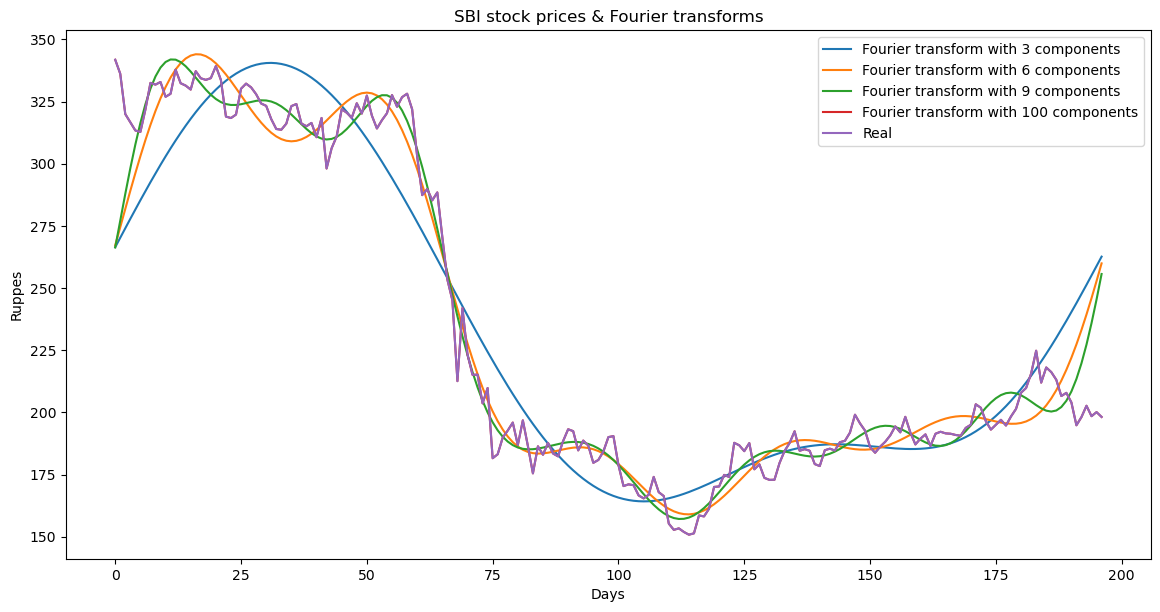

In [138]:
# This will help is in identifying the uptrend or downtrend to some extent
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('Ruppes')
plt.title('SBI stock prices & Fourier transforms')
plt.legend()
plt.show()

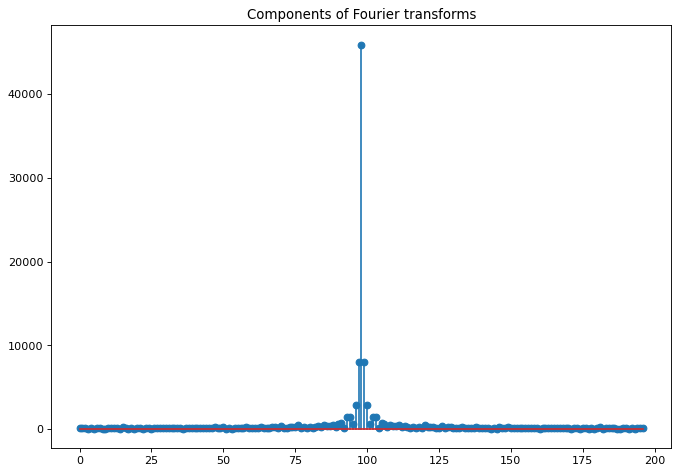

In [139]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Components of Fourier transforms')
plt.show()

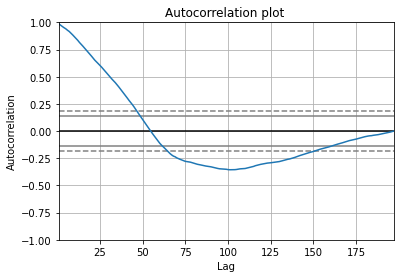

<Figure size 432x288 with 0 Axes>

In [140]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Close'])
plt.title('Autocorrelation plot ')
plt.figure()
plt.show()

<Figure size 720x504 with 0 Axes>

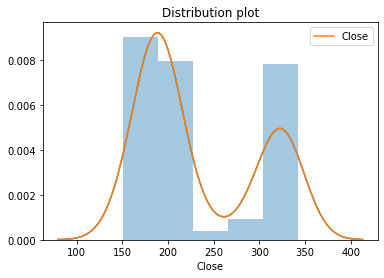

<Figure size 720x504 with 0 Axes>

In [141]:
sns.distplot(train['Close'])
plt.title('Distribution plot')
sns.kdeplot(train['Close'])
plt.figure(figsize=(10, 7))

In [142]:
#To check whether the time series is stationary or not we will conduct the ADF(Augumented Dickey-Fuller) test
#p-value > 0.05 : Not- stationary
#p-value <= 0.05 : Stationary
from statsmodels.tsa.stattools import adfuller
x = train['Close'].values
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.735748
p-value: 0.412794
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [172]:
#Lets fit the ARIMA model

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = data_FT['Close']
model = ARIMA(series, order=(5, 2, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  195
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -663.578
Method:                       css-mle   S.D. of innovations              7.244
Date:                Tue, 29 Dec 2020   AIC                           1341.156
Time:                        11:57:17   BIC                           1364.067
Sample:                             2   HQIC                          1350.432
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0400      0.161      0.248      0.804      -0.276       0.356
ar.L1.D2.Close    -0.8824      0.072    -12.331      0.000      -1.023      -0.742
ar.L2.D2.Close    -0.6060      0.093

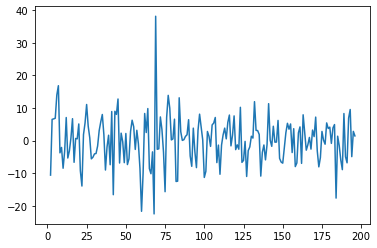

In [173]:

residual_error = pd.DataFrame(model_fit.resid)
plt.plot(residual_error)
plt.show()

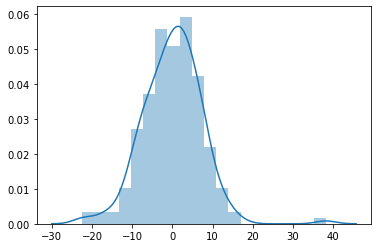

In [174]:
sns.distplot(residual_error)
# As you can see we have a near normal distribution.


In [175]:
train_data = series.values
test_data = test['Close'].values
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=198.370502, expected=195.449997
predicted=196.254605, expected=192.600006
predicted=190.723431, expected=185.800003
predicted=185.871490, expected=186.199997
predicted=184.556763, expected=183.800003
predicted=182.943261, expected=176.350006
predicted=175.741033, expected=182.199997
predicted=178.643156, expected=187.250000
predicted=187.181158, expected=185.050003
predicted=185.075927, expected=185.399994
predicted=182.240141, expected=190.300003
predicted=190.353951, expected=188.750000
predicted=190.063208, expected=191.600006
predicted=190.120920, expected=190.699997
predicted=190.126052, expected=191.500000
predicted=192.033255, expected=198.300003
predicted=196.753096, expected=198.699997
predicted=199.537863, expected=195.699997
predicted=195.129790, expected=200.050003
predicted=198.581164, expected=192.850006
predicted=194.741314, expected=195.949997
predicted=194.814524, expected=204.000000
predicted=202.046424, expected=203.050003
predicted=204.981518, expected=203

In [176]:
val_data = test['Close'].values
val = val_data.tolist()
val.insert(0, 198.20)
val = val[:-1]
print(val)
val_data = np.array(val)


[198.2, 195.449997, 192.600006, 185.800003, 186.199997, 183.800003, 176.350006, 182.199997, 187.25, 185.050003, 185.399994, 190.300003, 188.75, 191.600006, 190.699997, 191.5, 198.300003, 198.699997, 195.699997, 200.050003, 192.850006, 195.949997, 204.0, 203.050003, 203.75, 203.300003, 202.800003, 196.699997, 194.649994, 190.449997, 188.699997, 189.25, 196.050003, 204.75, 207.0, 218.649994, 219.19999700000002, 219.5, 231.69999700000002, 234.19999700000002, 226.80000299999998, 229.44999700000002, 240.19999700000002, 252.0, 239.75, 242.75, 238.69999700000002, 243.850006, 243.0, 245.44999700000002, 244.25, 248.05000299999998, 246.94999700000002, 256.299988, 263.5, 269.600006, 271.899994, 270.350006, 269.549988, 272.450012, 274.200012, 270.649994, 269.399994, 267.700012, 271.450012, 254.69999700000002, 257.450012, 263.0, 266.850006]


In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error_1= mean_squared_error(val_data, predictions)
print('Test MSE: %.3f' % error_1)

error_2= mean_absolute_error(val_data, predictions)
print('Test MAE: %.3f' % error_2)

error_3= mean_absolute_percentage_error(val_data, predictions)
print('Test MAPE: %.3f' % error_3)

error_4= np.sqrt(mean_squared_error(val_data, predictions))
print('Test RMSE: %.3f' % error_4)


Test MSE: 1.967
Test MAE: 1.122
Test MAPE: 16.203
Test RMSE: 1.402


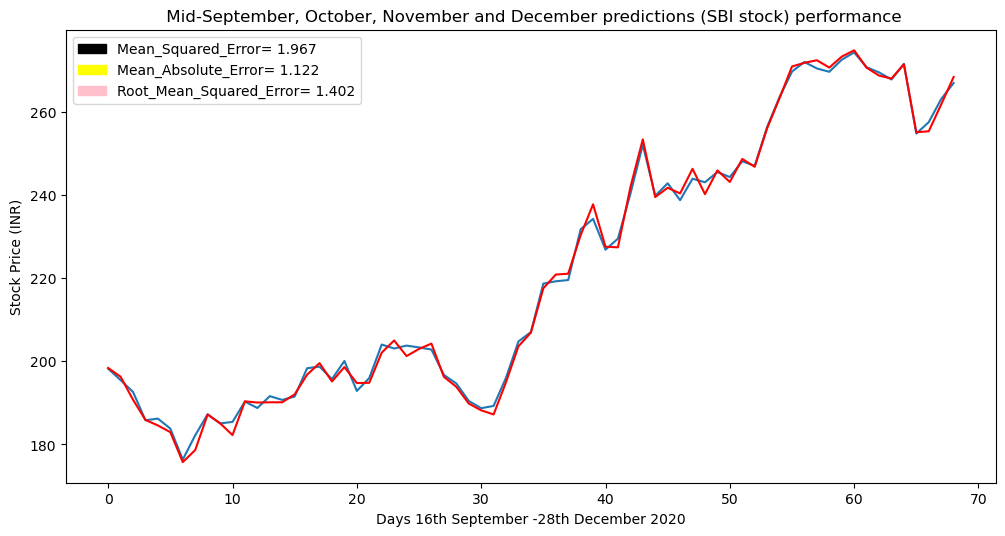

In [155]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(val_data, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days 16th September -28th December 2020')
plt.ylabel('Stock Price (INR)')
plt.title(' Mid-September, October, November and December predictions (SBI stock) performance')
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patch1 = mpatches.Patch(color='black', label='Mean_Squared_Error= 1.967')
patch2 = mpatches.Patch(color='yellow', label='Mean_Absolute_Error= 1.122')
patch3 = mpatches.Patch(color='pink', label='Root_Mean_Squared_Error= 1.402')

plt.legend(handles=[patch1,patch2,patch3])

plt.show()